In [2]:
import pandas as pd

# Path to the CSV file
csv_file_path = 'patients_data.csv'  # Update with the actual path

# Read the CSV file into a DataFrame
patients_df = pd.read_csv(csv_file_path)

In [12]:
class PhysicalExamProject:
    """
    A Python program designed as a Project to facilitate physical exams.
    This program collects patient information and medical history, calculates BMI,
    assesses blood pressure levels, and conducts a physical examination.
    
    Attributes:
        patient_info (dict): Stores patient's personal and medical history data.
        weight (float): Patient's weight in kilograms.
        height (float): Patient's height in meters.
        blood_pressure (tuple): Patient's blood pressure reading (systolic, diastolic).
        bmi (float): Calculated Body Mass Index of the patient.
        weight_class (str): Categorization of patient's weight status.
        bp_category (str): Classification of patient's blood pressure level.
    
    Methods:
        collect_patient_info(): Gathers patient data through input prompts.
        calculate_bmi(): Computes BMI and determines the weight class.
        assess_blood_pressure(): Evaluates blood pressure and categorizes level.
        conduct_physical_exam(): Guides through the steps of a physical exam.
    
    Developed by: Xavier Walls
    Duration: November 2023
    """
    
    def __init__(self, patients_df):
        """Initializes the Physical Exam Project with default values."""
        self.patient_info = patients_df
        self.weight = patients_df['Weight_kg']
        self.height = patients_df['Height_cm']
        self.blood_pressure = (patients_df['BloodPressure_Systolic'],
                               patients_df['BloodPressure_Diastolic'])
        self.bmi = self.calculate_bmi()
        self.weight_class = self.determine_weight_class()
        self.categorize_blood_pressure = self.categorize_blood_pressure()
    
    def collect_patient_info(self):
        """Collects patient's personal and medical history."""
        # Implementation of patient data collection
    
    def calculate_bmi(self):
        """Calculates BMI and returns it."""
        height_in_meters = self.height / 100
        bmi = self.weight / (height_in_meters ** 2)
        return bmi
    
    def categorize_blood_pressure(self):
        """Categorizes blood pressure level."""
        systolic, diastolic = self.blood_pressure
        if systolic < 120 and diastolic < 80:
            return 'Normal'
        elif 120 <= systolic < 130 and diastolic < 80:
            return 'Elevated'
        elif 130 <= systolic < 140 or 80 <= diastolic < 90:
            return 'High blood pressure (Hypertension) Stage 1'
        elif systolic >= 140 or diastolic >= 90:
            return 'High blood pressure (Hypertension) Stage 2'
        else:
            return 'Hypertensive Crisis (consult your doctor immediately)'
    
    def determine_weight_class(self):
        """Determines the weight class based on BMI."""
        if self.bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= self.bmi < 25:
            return 'Normal weight'
        elif 25 <= self.bmi < 30:
            return 'Overweight'
        else:
            return 'Obesity'
    
    def conduct_physical_exam(self):
        """Conducts a physical exam and returns the exam report."""
        report = {
            'FullName': self.patient_info['FullName'],
            'BMI': f"{self.bmi:.2f}",
            'WeightClass': self.weight_class,
            'BloodPressure': f"{self.blood_pressure[0]}/{self.blood_pressure[1]}",
            'BloodPressureCategory': self.categorize_blood_pressure
        }
        return report

# Read patient data from CSV
csv_file_path = 'patients_data.csv'  # Update with the actual path
patients_df = pd.read_csv(csv_file_path)

# List to hold all exam reports
exam_reports = []

# Perform physical exam for each patient and store the reports
for index, patient_data in patients_df.iterrows():
    exam = PhysicalExamProject(patient_data)
    exam_report = exam.conduct_physical_exam()
    exam_reports.append(exam_report)

# Convert the list of exam reports to a DataFrame
exam_reports_df = pd.DataFrame(exam_reports)

# Output the DataFrame to a CSV file
output_csv_path = 'output_exam_reports.csv'  # Update with the actual path
exam_reports_df.to_csv(output_csv_path, index=False)

output_csv_path
exam_reports_df




,FullName,BMI,WeightClass,BloodPressure,BloodPressureCategory
0,Crystal Young,40.33,Obesity,133/84,High blood pressure (Hypertension) Stage 1
1,Henry Hayes,21.52,Normal weight,92/88,High blood pressure (Hypertension) Stage 1
2,Joshua Walker,21.78,Normal weight,118/78,Normal
3,Michael Fields,22.18,Normal weight,118/83,High blood pressure (Hypertension) Stage 1
4,Danielle Garcia,32.27,Obesity,137/64,High blood pressure (Hypertension) Stage 1
...,...,...,...,...,...
95,Gabriela Williams,17.32,Underweight,107/61,Normal
96,Jack Johnson,34.63,Obesity,92/89,High blood pressure (Hypertension) Stage 1
97,Jacob Miller,33.15,Obesity,129/88,High blood pressure (Hypertension) Stage 1
98,Daniel Brady,27.41,Overweight,112/67,Normal


In [14]:
# We will calculate the prevalence of obesity and hypertension.
obesity_prevalence = exam_reports_df['WeightClass'].value_counts(normalize=True)['Obesity']
hypertension_prevalence = exam_reports_df['BloodPressureCategory'].value_counts(normalize=True)[
    ['High blood pressure (Hypertension) Stage 1']
].sum()

obesity_prevalence, hypertension_prevalence

(0.37, 0.53)

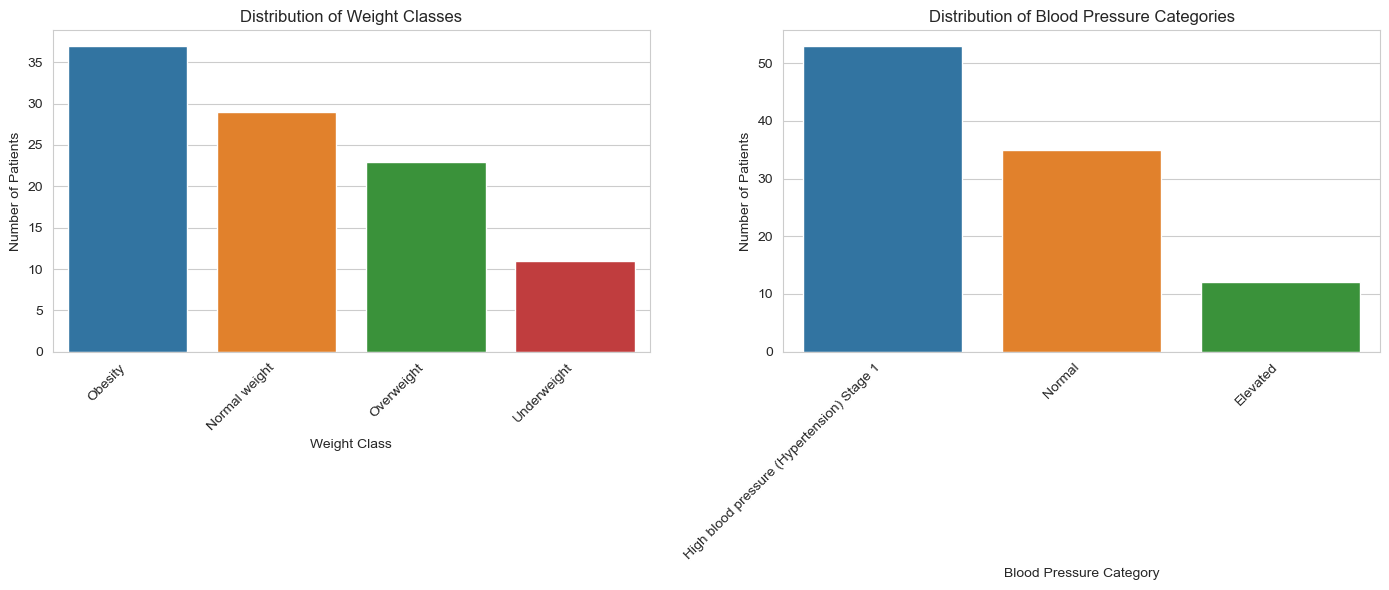

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare data for plotting
weight_classes = exam_reports_df['WeightClass'].value_counts()
bp_categories = exam_reports_df['BloodPressureCategory'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Weight Class distribution
sns.barplot(x=weight_classes.index, y=weight_classes.values, ax=axes[0])
axes[0].set_title('Distribution of Weight Classes')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xlabel('Weight Class')

# Plot Blood Pressure Category distribution
sns.barplot(x=bp_categories.index, y=bp_categories.values, ax=axes[1])
axes[1].set_title('Distribution of Blood Pressure Categories')
axes[1].set_ylabel('Number of Patients')
axes[1].set_xlabel('Blood Pressure Category')

# Rotate x-axis labels for readability
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
